In [127]:
'''
This code cleans the csv data for the location variable
'''

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read in twitter csv file
df = pd.read_csv('twitter_data_master.csv')

# create df with only location and screen name variables
df_location = df.drop(['index','tweet_id','name','description','url',
                       'followers_count','friends_count','listed_count',
                       'geo','coordineates','place','text','created_at',
                       'favorite_count','retweet_count','source',
                       'in_reply_to_status_id','datetime','Unnamed: 20'], axis=1)

# remove duplicates of tweets from the same user
df_location = df_location.drop_duplicates(subset="screen_name", keep="first", inplace=False)

# remove locations that only occur once
# Given that the location is input by the user, these locations are 
# likely not legitimate locations or not significant for our analysis 
df_location = df_location.groupby('location').filter(lambda x : len(x)>1)
df_location = df_location.drop(['screen_name'], axis=1)

df_location['location'].value_counts().head()

United States      56
London, England    40
New York, NY       28
Paris, France      27
Boston, MA         26
Name: location, dtype: int64

Text(0.5, 0, 'Location')

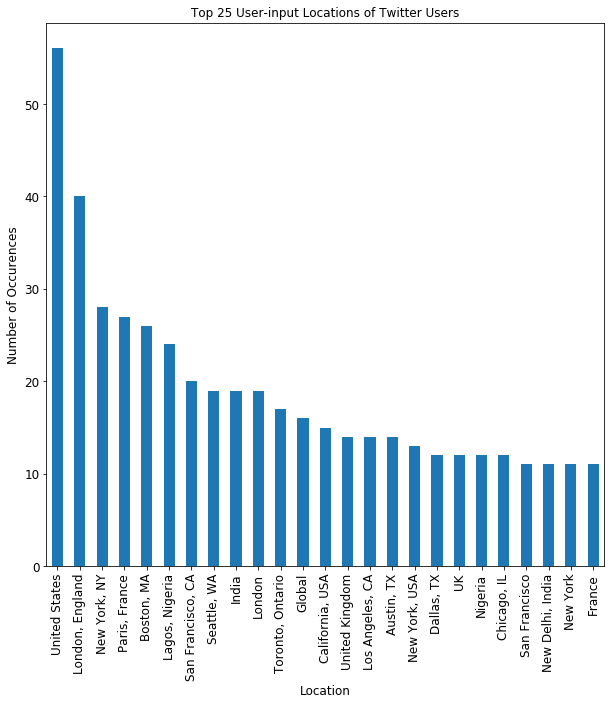

In [113]:
'''
This code takes the df_location dataframe and sorts by count.
Creates plot showing the top 25 user input locations
(Not used in report)
'''

# group dataframe by location
by_location = df_location.groupby(df_location.location)

# count and sort locations
count = by_location.size().sort_values(ascending=False)

# create dataframe for location and count
location_count = pd.DataFrame([count]).T
location_count.rename(columns = {0:"count"}, inplace = True)

# take the top ten locations from the location_count dataframe
top_overall = location_count[:25]

#plot the top 25 locations
ax = top_overall[['count']].plot(kind='bar', figsize=(10, 10), fontsize=12, legend=False)
ax.set_title('Top 25 User-input Locations of Twitter Users')
ax.set_ylabel("Number of Occurences", fontsize=12)
ax.set_xlabel("Location", fontsize=12)

In [126]:
'''
This code takes the df_location dataframe and pulls the US Cities.
Creates a dataframe of the top US Cities and plots map
'''

# Create list of state abbreviations to pull city,state values 
state_list = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL',
             'GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD',
             'MA','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY',
             'NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX',
             'UT','VT','VA','WA','WV','WI','WY']

# pull city, state values from df_location
df_citystate = df_location[df_location["location"].str.contains('|'.join(state_list))]

# remove state and create dataframe of only cities
df_citystate[["city","state"]]= df_citystate["location"].str.split(",", n = 1, expand = True)
df_city = pd.DataFrame(df_citystate['city'])
df_city.rename(columns = {'city':'location'}, inplace = True)

# there are locations where only the city was input
# create dataframe of cities that match any of the cities in df_city
df_cityonly = df_location[df_location["location"].isin(df_city['location'])]
frames = [df_city, df_cityonly]
df_allcity = pd.concat(frames)

# group dataframe by location city
by_locationcity = df_allcity.groupby(df_allcity.location)

# count and sort locations
count = by_locationcity.size().sort_values(ascending=False)

# create dataframe for location and count
location_city = pd.DataFrame([count]).T
location_city.rename(columns = {0:"count"}, inplace = True)

# drop values not applicable 
location_city.drop(["NYC","#NAME?","NY"], inplace=True)

# print dataframe
location_city.head()


,count
location,
New York,39
Boston,32
San Francisco,31
Seattle,22
Los Angeles,18


Text(0.5, 0, 'Location')

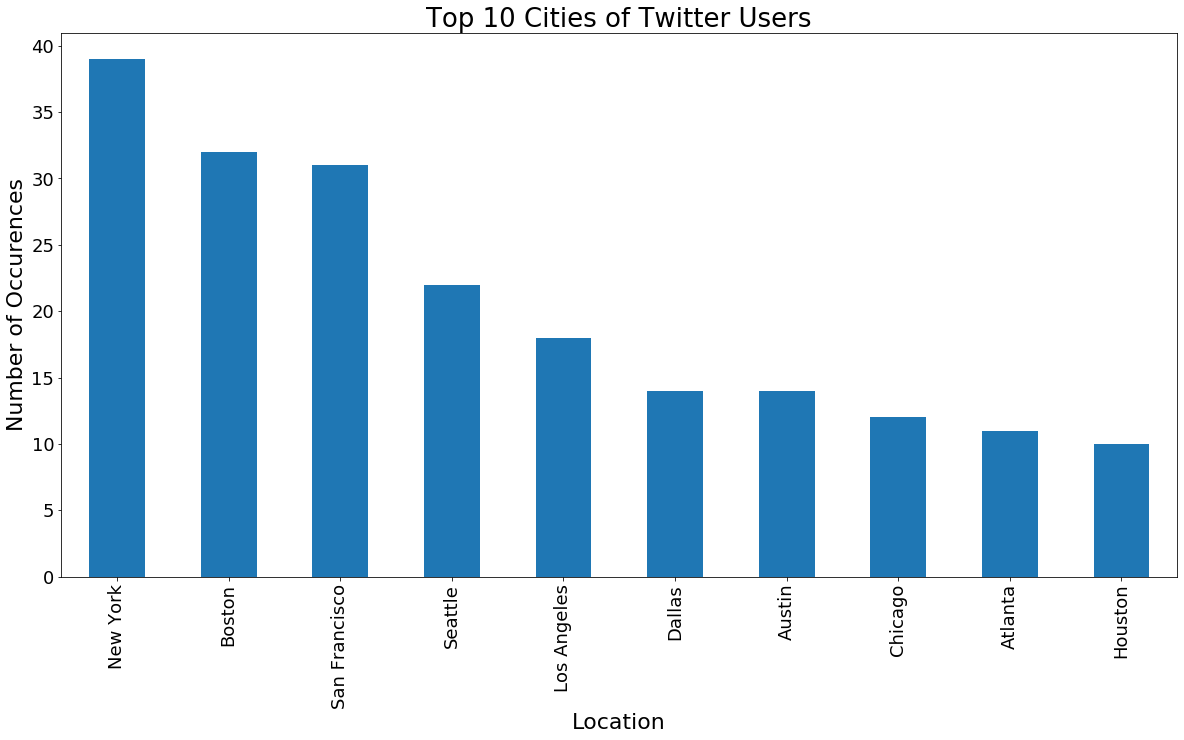

In [115]:
'''
This code takes the location_city dataframe and sorts by count.
Creates plot showing the top 10 cities
'''

# take the top ten locations from the location_count dataframe
top_city = location_city[:10]

#plot the top 25 locations
ax = top_city[['count']].plot(kind='bar', figsize=(20, 10), fontsize=18, legend=False)
ax.set_title('Top 10 Cities of Twitter Users', fontsize=26)
ax.set_ylabel("Number of Occurences", fontsize=22)
ax.set_xlabel("Location", fontsize=22)

In [124]:
'''
This code takes the df_location dataframe and pulls the US States.
Creates a dataframe of the top US States and plots map
'''

# Create list of state abbreviations to pull city,state values 
state_list = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL',
             'GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD',
             'MA','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY',
             'NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX',
             'UT','VT','VA','WA','WV','WI','WY']

# pull city, state values from df_location
df_citystate = df_location[df_location["location"].str.contains('|'.join(state_list))]

# remove state and create dataframe of only cities
df_citystate[["city","state"]]= df_citystate["location"].str.split(",", n = 1, expand = True)
df_state = pd.DataFrame(df_citystate['state'])
df_state.rename(columns = {'state':'location'}, inplace = True)

# group dataframe by location state
by_locationstate = df_state.groupby(df_state.location)

# count and sort locations
count = by_locationstate.size().sort_values(ascending=False)

# create dataframe for location and count
location_state = pd.DataFrame([count]).T
location_state.rename(columns = {0:"count"}, inplace = True)

# print dataframe
location_state.reset_index(inplace=True)
location_state.head()

,location,count
0,CA,70
1,TX,41
2,NY,35
3,MA,30
4,WA,28


In [123]:
'''
This code reads in a .shp file which contains the geospatial data
information for the US states map. The .shp was pulled from
https://www.arcgis.com/
'''
import geopandas as gpd
import shapefile as shp

# read in .shp file for US map and include state count
usa = gpd.read_file('.\states_21basic\states.shp')
usa = usa.sort_values(by="STATE_ABBR")
usa['count'] = [0,0,0,7,70,11,2,0,0,7,11,0,0,0,17,0,0,2,2,30,7,0,0,7,4,0,0,
                10,0,0,0,0,2,3,35,5,0,3,19,0,2,0,5,41,4,2,0,28,0,0,0]

# print dataframe
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,count
50,Alaska,51,02,Pacific,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824...",0
42,Alabama,43,01,East South Central,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",0
46,Arkansas,47,05,West South Central,AR,"POLYGON ((-94.46169 34.19677, -94.45262 34.508...",0
36,Arizona,37,04,Mountain,AZ,"POLYGON ((-114.52063 33.02771, -114.55909 33.0...",7
24,California,25,06,Pacific,CA,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823...",70


Text(0.5, 485.1600000000002, 'Number of Twitter Users by State')

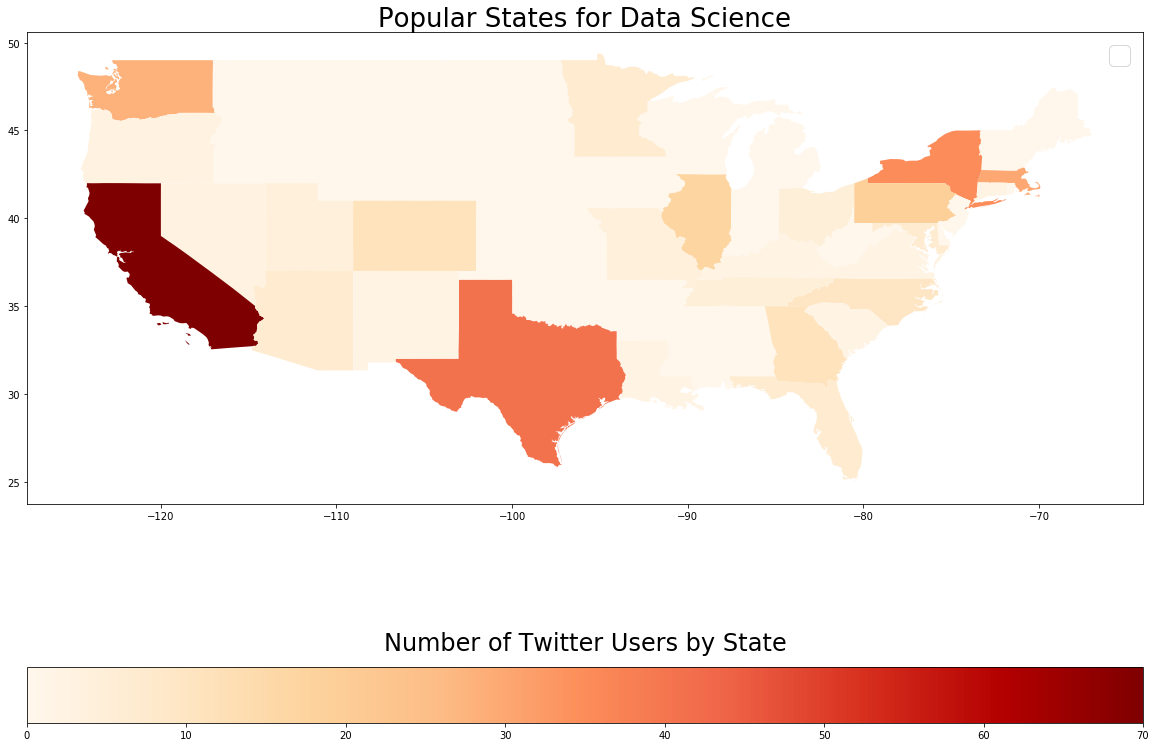

In [219]:
'''
This code plots a chorpleth map for US states
'''
import geopandas as gpd
from shapely.geometry import Point, Polygon
from descartes import PolygonPatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


gdf_usa = gpd.read_file('.\states_21basic\states.shp')
gdf_usa = gdf_usa[gdf_usa.STATE_ABBR != 'HI']
gdf_usa = gdf_usa[gdf_usa.STATE_ABBR != 'AK']
gdf_usa['count'] = usa['count']

fig,ax=plt.subplots(figsize=(20,20))

ax = gdf_usa.plot(column='count',
             cmap='OrRd',
             ax=ax,
             legend=True,
             legend_kwds={'orientation':'horizontal'})
ax.set_title('Popular States for Data Science', fontsize=26)
ax.legend('Popular States for Data Science', fontsize=26)
ax.set_xlabel("Number of Twitter Users by State",fontsize=24,  labelpad=110)


In [122]:
'''
This code takes the df_location dataframe and pulls the US-related
locations. Then creates a dataframe of the remaining international
countries.
'''

# Create list of US-related values 
usa_list = ['Alabama','AL','Alaska', 'AK','Arizona','AZ',
            'Arkansas','AR','California','CA','Colorado','CO',
            'Connecticut','CT','Delaware','DE','Florida','FL',
            'Georgia','GA','Hawaii','HI','Idaho','ID','Illinois','IL',
            'Indiana','IN','Iowa','IA','Kansas','KS','Kentucky','KY',
            'Louisiana','LA','Maine','ME','Maryland','MD',
            'Massachusetts','MA','Michigan','MI','Minnesota','MN',
            'Mississippi','MS','Missouri','MO','Montana','MT',
            'Nebraska','NE','Nevada','NV','New Hampshire','NH',
            'New Jersey','NJ','New Mexico','NM','New York','NY',
            'North Carolina','NC','North Dakota','ND','Ohio','OH',
            'Oklahoma','OK','Oregon','OR','Pennsylvania','PA',
            'Rhode Island','RI','South Carolina','SC',
            'South Dakota','SD','Tennessee','TN','Texas','TX',
            'Utah','UT','Vermont','VT','Virginia','VA',
            'Washington','WA','West Virginia','WV','Wisconsin','WI',
            'Wyoming','WY','USA','United States']

# pull US values into dataframe
df_usa = df_location[df_location["location"].str.contains('|'.join(usa_list))]

# split city/state and state/USA values and drop 2nd value
df_usa[["one","two"]]= df_usa["location"].str.split(",", n = 1, expand = True)
df_split = pd.DataFrame(df_usa['one'])
df_split.rename(columns = {'one':'location'}, inplace = True)

# there are locations where only the city or state was input
# create dataframe of all US locations
df_remaining = df_location[df_location["location"].isin(df_split['location'])]
df_allusa = df_usa.append([df_remaining],[df_usa])

# create dataframe of all locations not in the all US dataframe 
df_intl = df_location[~df_location['location'].isin(df_allusa['location'])]

# remove city and create dataframe of only countries
df_intl[["city","country"]]= df_intl["location"].str.split(",", n = 1, expand = True)
df_country = pd.DataFrame(df_intl['country'])
df_country.rename(columns = {'country':'location'}, inplace = True)

# there are locations where only the country was input
# create dataframe of countries that match any of the countries in df_country
df_countryonly = df_location[df_location["location"].isin(df_country['location'])]
df_allcountry = pd.concat([df_country, df_countryonly])

#df_allcountry.rename(index={'India':'P'},inplace=True)
#df_allcountry.drop(index="India", inplace=True)
#df_allcountry['location'] = df_allcountry['location'].map({'India': "1"})
#df_allcountry = df_allcountry.replace({"India":"P"})
#df_allcountry.replace("India", np.nan)
# df_allcountry.loc[(df_allcountry.location == "India")] = "PP"
# df_allcountry.head(50)

# group dataframe by location
by_location = df_country.groupby(df_allcountry.location)

# count and sort locations
count = by_location.size().sort_values(ascending=False)

# create dataframe for location and count
location_country = pd.DataFrame([count]).T
location_country.rename(columns = {0:"count"}, inplace = True)

# print dataframe
location_country.head(5)

,count
location,
England,55
India,54
France,39
Nigeria,29
Ontario,20


In [129]:
'''
This code uses geopandas to combine the country dataframe with the 
the geospatial information needed to plot the country locations
on a world map
'''

import geopandas
from descartes import PolygonPatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Manually input latitude and longitude data in a country dataframe
country = ['England','India','France','Nigeria','Canada','Germany',
           'Scotland', 'South Africa','Kenya', 'The Netherlands']
count = [55,54,39,29,27,22,8,8,8,5]

lat = [52.36,20.59,46.22,9.08,56.13,51.17,56.49,-30.56,-0.02,52.13]
long = [-1.17,78.96,2.21,8.68,-106.34,10.45,-4.20,22.94,37.91,5.29]

df =pd.DataFrame(country,columns=["country"])
df["count"] = count
df['lat'] = lat
df['long'] = long

# combine country dataframe with geospatial data
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.long, df.lat))
gdf.head()

,country,count,lat,long,geometry
0,England,55,52.36,-1.17,POINT (-1.17000 52.36000)
1,India,54,20.59,78.96,POINT (78.96000 20.59000)
2,France,39,46.22,2.21,POINT (2.21000 46.22000)
3,Nigeria,29,9.08,8.68,POINT (8.68000 9.08000)
4,Canada,27,56.13,-106.34,POINT (-106.34000 56.13000)


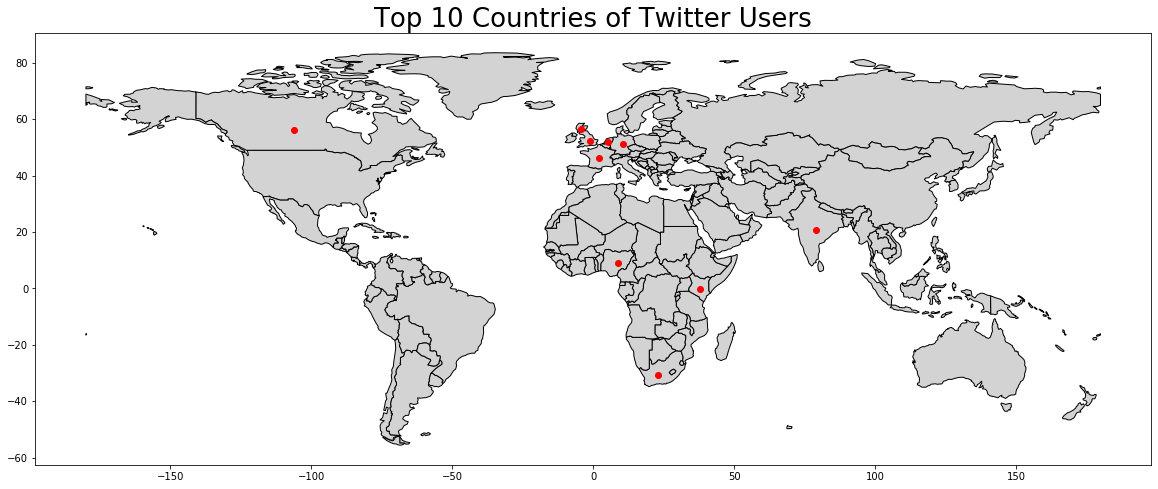

In [130]:
'''
This code plots the country on a world map using geopandas
'''

# read files (code provided on geopandas site)
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]

# code axis information and plot
ax = world.plot(figsize=(20,20),color='lightgrey', edgecolor='k')
ax.set_title('Top 10 Countries of Twitter Users', fontsize=26)
gdf.plot(ax=ax, color='red')

In [15]:
world.head(50)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
